In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import os

# Getting data

In [2]:
DATA_PATH = "./data/"
CHART_PATH = "./chart/"

dfs = []
for i, file_name in enumerate(os.listdir(DATA_PATH)):
    if file_name.endswith(".csv"):
        dfs.append(pd.read_csv(DATA_PATH + file_name, na_values="nan"))

# dfs = [df.dropna(axis=0) for df in dfs]


# Charting

## 1


In [3]:
df = dfs[0].dropna(axis=0)

x_axis = "n"
y1_axis = "t_tot"
y2_axis = "m_tot"

df = df.sort_values(by=x_axis)
df['dm_sec'] = df['dm_sec'] * 4
df['m_tot'] = df['dm_prim'] + df['dm_sec']

df['t_sec_p'] = (df['dt_sec'] / df['t_tot']) * 100
df['m_sec_p'] = (df['dm_sec'] / df['m_tot']) * 100


df[y1_axis] = df[y1_axis].apply(lambda x: x/1000/1000) 
df[y2_axis] = df[y2_axis].apply(lambda x: x/1024/1024)

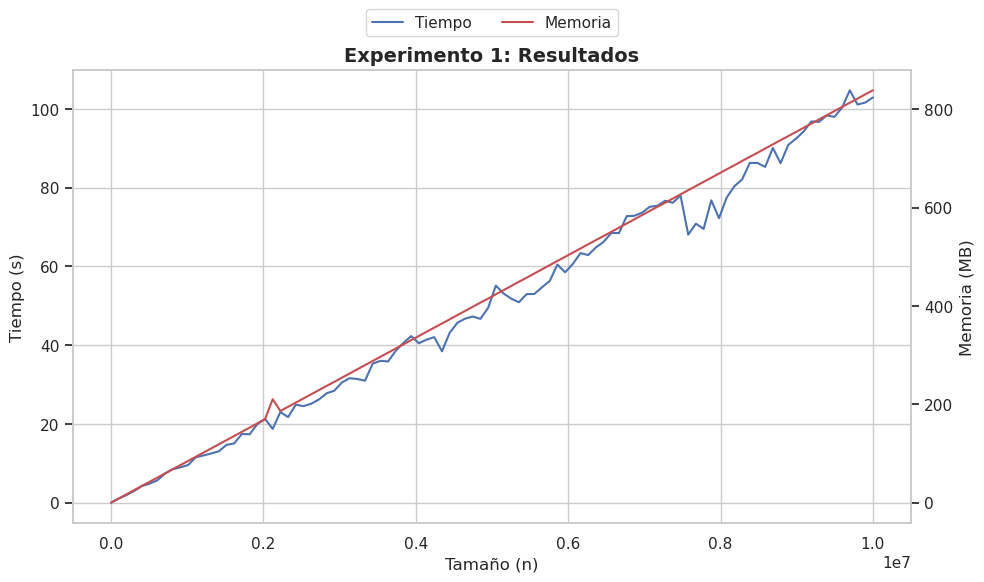

In [4]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Tamaño (n)")
ax1.set_ylabel("Tiempo (s)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (MB)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 1: Resultados', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "1_1.png")
plt.show()

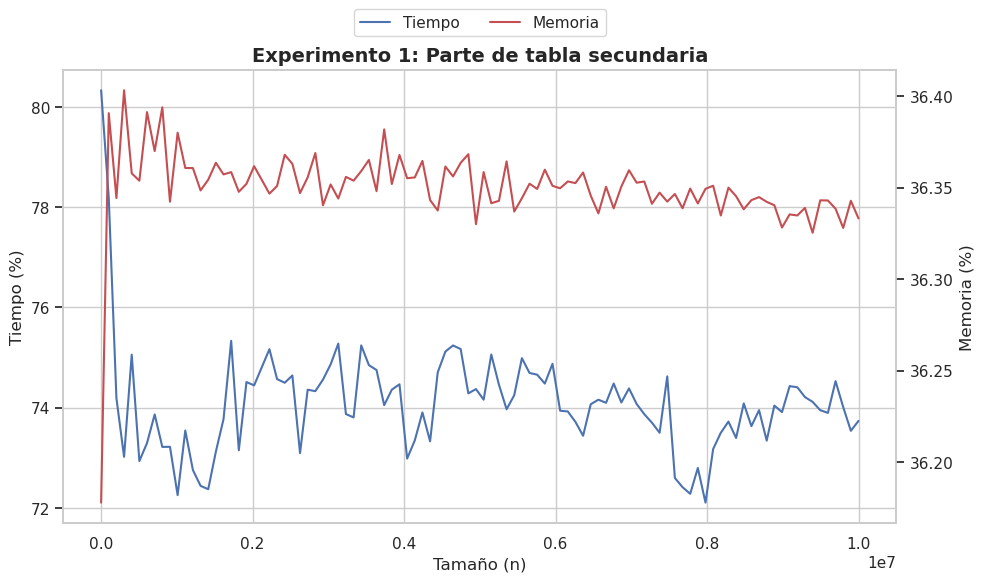

In [5]:
x_axis = "n"
y1_axis = "t_sec_p"
y2_axis = "m_sec_p"

df = df[df['m_sec_p'] <= 39]

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Tamaño (n)")
ax1.set_ylabel("Tiempo (%)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (%)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 1: Parte de tabla secundaria', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "1_2.png")
plt.show()

## 2

In [6]:
df = dfs[1].dropna(axis=0)

x_axis = "k"
y1_axis = "t_tot"
y2_axis = "m_tot"

df = df.sort_values(by=x_axis)

df['dm_sec'] = df['dm_sec'] * 4
df['m_tot'] = df['dm_prim'] + df['dm_sec']


df['t_sec_p'] = (df['dt_sec'] / df['t_tot']) * 100
df['m_sec_p'] = (df['dm_sec'] / df['m_tot']) * 100

df[y1_axis] = df[y1_axis].apply(lambda x: x/1000/1000) 
df[y2_axis] = df[y2_axis].apply(lambda x: x/1024/1024)

df = df[df["m_tot"] <= 90]

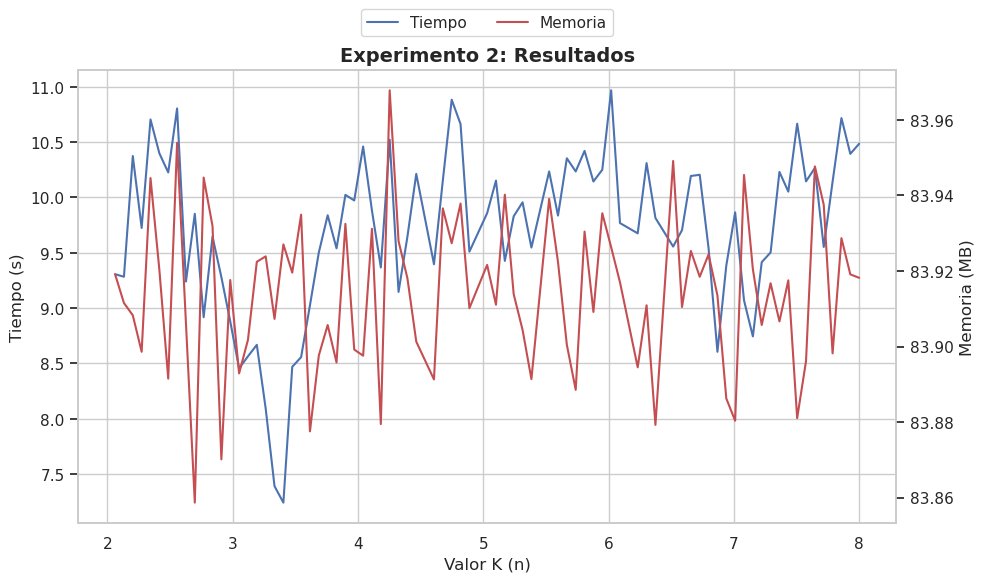

In [7]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Valor K (n)")
ax1.set_ylabel("Tiempo (s)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (MB)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 2: Resultados', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "2_1.png")
plt.show()

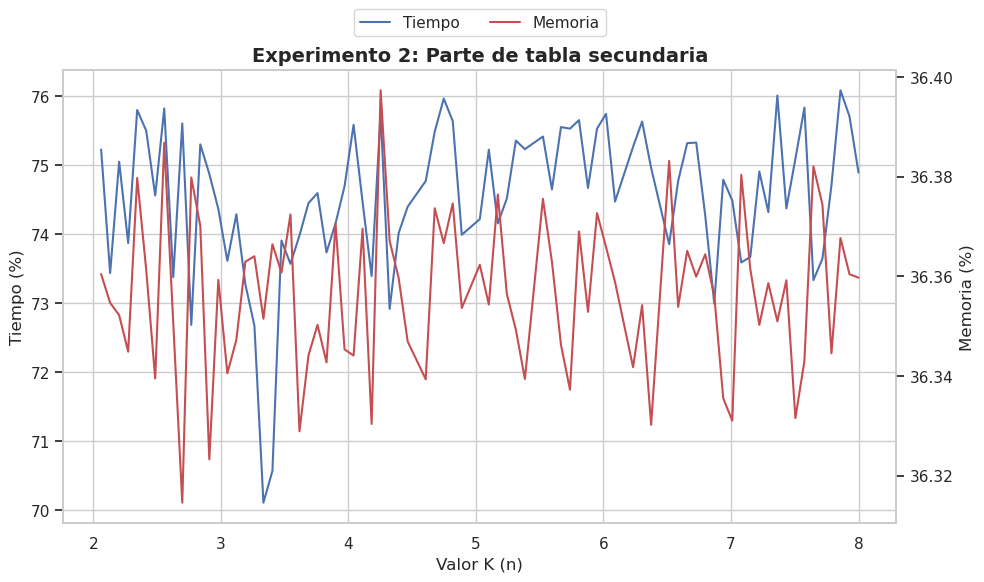

In [8]:
x_axis = "k"
y1_axis = "t_sec_p"
y2_axis = "m_sec_p"

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Valor K (n)")
ax1.set_ylabel("Tiempo (%)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (%)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 2: Parte de tabla secundaria', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "2_2.png")
plt.show()

## 3

In [9]:
df = dfs[2].dropna(axis=0)

x_axis = "c"
y1_axis = "t_tot"
y2_axis = "m_tot"

df = df.sort_values(by=x_axis)

df['dm_sec'] = df['dm_sec'] * 4
df['m_tot'] = df['dm_prim'] + df['dm_sec']


df['t_sec_p'] = (df['dt_sec'] / df['t_tot']) * 100
df['m_sec_p'] = (df['dm_sec'] / df['m_tot']) * 100

df[y1_axis] = df[y1_axis].apply(lambda x: x/1000/1000) 
df[y2_axis] = df[y2_axis].apply(lambda x: x/1024/1024)

# df = df[df["m_tot"] <= 90]

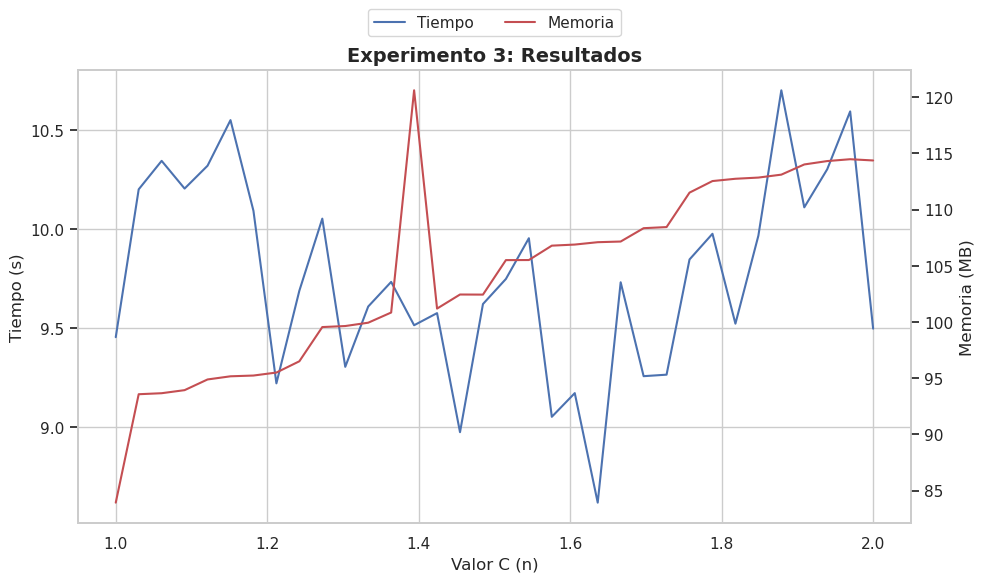

In [10]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Valor C (n)")
ax1.set_ylabel("Tiempo (s)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (MB)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 3: Resultados', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "3_1.png")
plt.show()

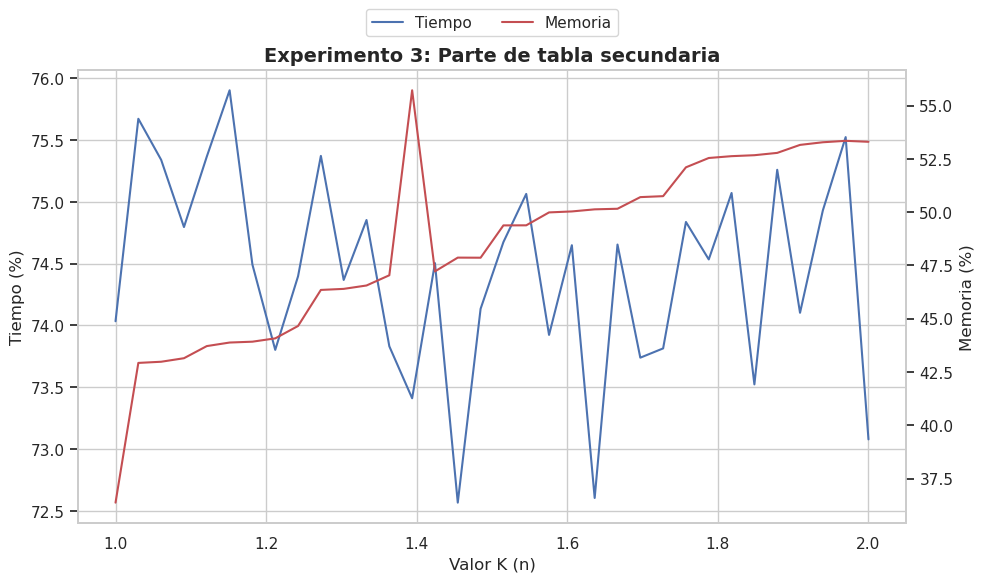

In [11]:
x_axis = "c"
y1_axis = "t_sec_p"
y2_axis = "m_sec_p"

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# l1, = ax1.plot(df[x_axis], df[y1_axis], color="b", label="Tiempo")
sns.lineplot(
    x=x_axis, y=y1_axis, data=df, ax=ax1, color="b", label="Tiempo", legend=False
)
ax1.set_xlabel("Valor K (n)")
ax1.set_ylabel("Tiempo (%)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
# l2, = ax2.plot(df[x_axis], df[y2_axis], color="r", label="Memoria")
sns.lineplot(
    x=x_axis, y=y2_axis, data=df, ax=ax2, color="r", label="Memoria", legend=False
)
ax2.set_ylabel("Memoria (%)")
ax2.tick_params(axis="y")
ax2.grid(False)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# ax1.legend(lines, labels, loc='best')

plt.title('Experimento 3: Parte de tabla secundaria', fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.savefig(CHART_PATH + "3_2.png")
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.isclose(df[col_N], N_fixed, atol=50)
# Crear un grid de puntos 3D
n = np.linspace(-2, 2, 10)
k = np.linspace(-2, 2, 10)
c = np.linspace(-2, 2, 10)
X, Y, Z = np.meshgrid(n, k, c)

# Definir la función escalar
F = X**2 + Y**2 - Z**2

# Calcular el gradiente de la función escalar
U, V, W = np.gradient(F, n, k, c)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 10))  # Aumentar el tamaño del gráfico
ax = fig.add_subplot(111, projection='3d')

# Dibujar el campo de gradiente como flechas
ax.quiver(X, Y, Z, U, V, W, length=0.2, normalize=True, color='blue', alpha=0.7)

# Establecer los límites de los ejes
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
ax.set_zlim([-2.5, 2.5])

# Etiquetas de los ejes
ax.set_xlabel('X-axis', fontsize=12, labelpad=20)  # Aumentar el espacio para la etiqueta
ax.set_ylabel('Y-axis', fontsize=12, labelpad=20)  # Aumentar el espacio para la etiqueta
ax.set_zlabel('Z-axis', fontsize=12, labelpad=20)  # Aumentar el espacio para la etiqueta

# Título del gráfico
ax.set_title("Campo de Gradiente 3D", fontsize=14, fontweight='bold', pad=30)  # Aumentar espacio para el título

# Ajustar el diseño para evitar cortes
plt.tight_layout()

plt.show()


NameError: name 'col_N' is not defined

In [130]:
df = dfs[3]

df['dm_sec'] = df['dm_sec'] * 4
df['m_tot'] = df['dm_prim'] + df['dm_sec']

df['t_tot'] = df['t_tot'].apply(lambda x: x/1000/1000) 
df['m_tot'] = df['m_tot'].apply(lambda x: x/1024/1024)
    
# Normalizar las columnas dentro de cada grupo 'n' de manera eficiente
df['t_norm_n'] = df.groupby('n')['t_tot'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df['m_norm_n'] = df.groupby('n')['m_tot'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df['score_n'] = (df['t_norm_n']**2 + df['m_norm_n']**2)**1/2

df['t_norm'] = df['t_tot'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df['m_norm'] = df['m_tot'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df['score'] = (df['t_norm']**2 + df['m_norm']**2)**1/2

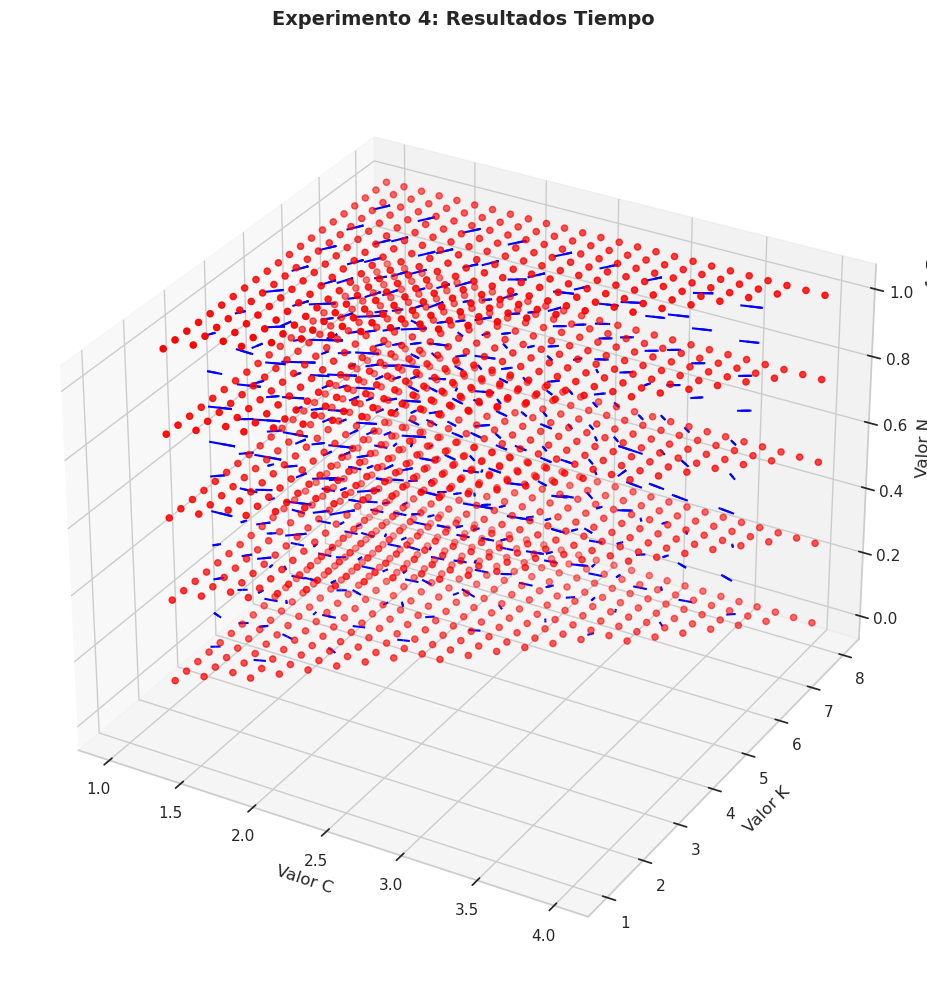

In [133]:
# Escalar las variables
# df['c_norm'] = (df['c'] - df['c'].min()) / (df['c'].max() - df['c'].min())
# df['k_norm'] = (df['k'] - df['k'].min()) / (df['k'].max() - df['k'].min())
# df['n_norm'] = (df['n'] - df['n'].min()) / (df['n'].max() - df['n'].min())

# Variables directas
x = df['c']
y = df['k']
z = df['n']
f = df['score']

# Crear una máscara para puntos válidos
valid_mask = ~f.isna()

# Filtrar los datos válidos
x_valid = x[valid_mask]
y_valid = y[valid_mask]
z_valid = z[valid_mask]
f_valid = f[valid_mask]

# Crear un grid 3D regular para interpolar los datos
grid_x, grid_y, grid_z = np.meshgrid(
    np.linspace(x.min(), x.max(), 20),
    np.linspace(y.min(), y.max(), 20),
    np.linspace(z.min(), z.max(), 20)
)

# Interpolación para rellenar el grid
grid_f = griddata(
    points=np.array([x_valid, y_valid, z_valid]).T,
    values=f_valid,
    xi=(grid_x, grid_y, grid_z),
    method='linear'
)

# Calcular el gradiente en el grid
grad_Fx, grad_Fy, grad_Fz =np.gradient(grid_f, axis=(0, 1, 2))

# Crear la figura 3D
fig = plt.figure(figsize=(12, 10))  # Aumentar el tamaño del gráfico
ax = fig.add_subplot(111, projection='3d')

# Submuestreo para evitar demasiadas flechas
skip = (slice(None, None, 2), slice(None, None, 2), slice(None, None, 2))

# Graficar el campo vectorial (gradiente)
ax.quiver(
    grid_x[skip], grid_y[skip], grid_z[skip],
    grad_Fx[skip], grad_Fy[skip], grad_Fz[skip],
    length=0.6, normalize=True, color='blue'
)

# Opcional: Graficar los puntos válidos
ax.scatter(x_valid, y_valid, z_valid, color='red', label='Puntos válidos')

ax.set_title("Experimento 4: Resultados Tiempo", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Valor C")
ax.set_ylabel("Valor K")
ax.set_zlabel("Valor N")
plt.tight_layout()
plt.show()


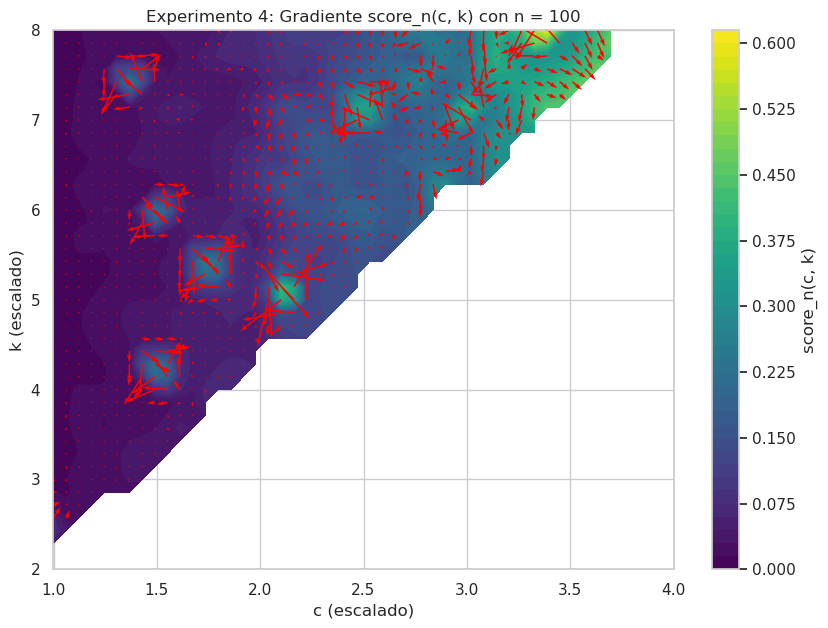

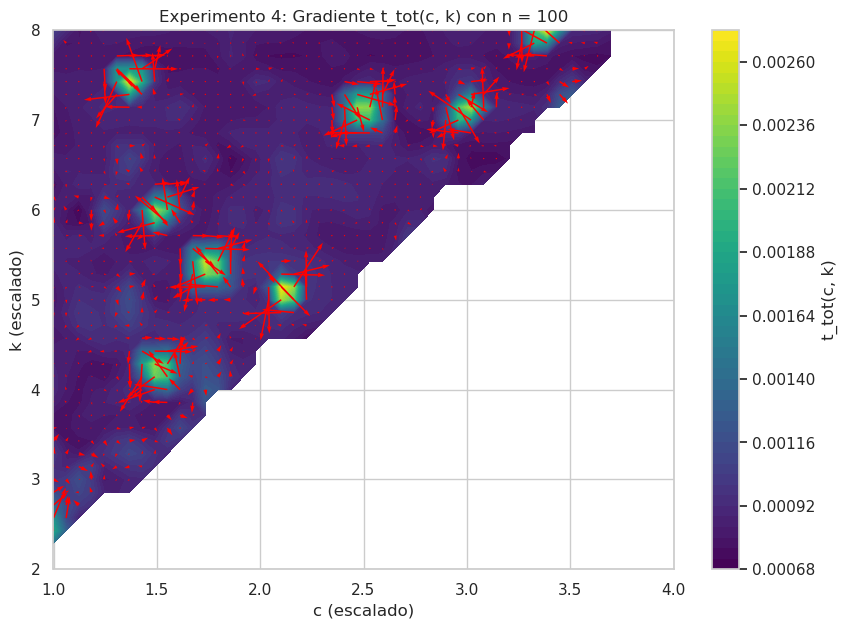

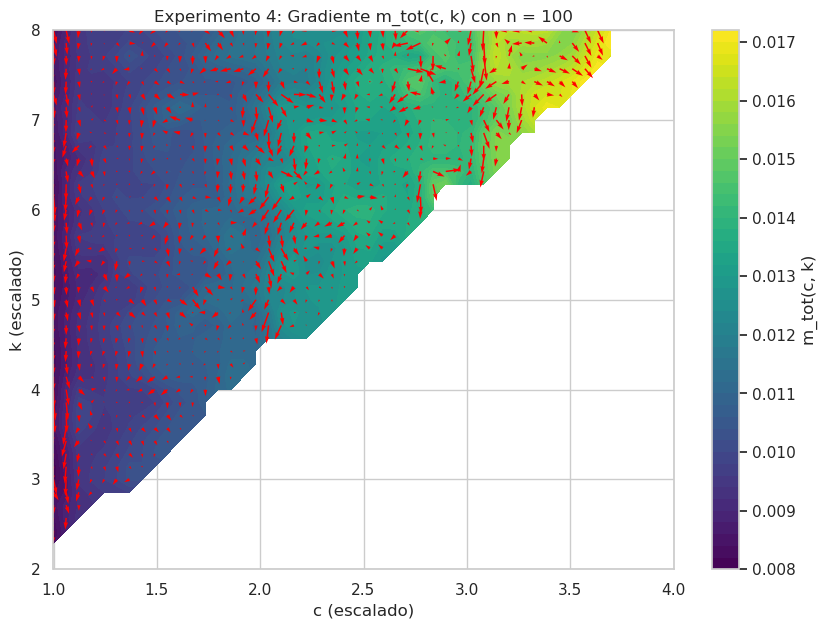

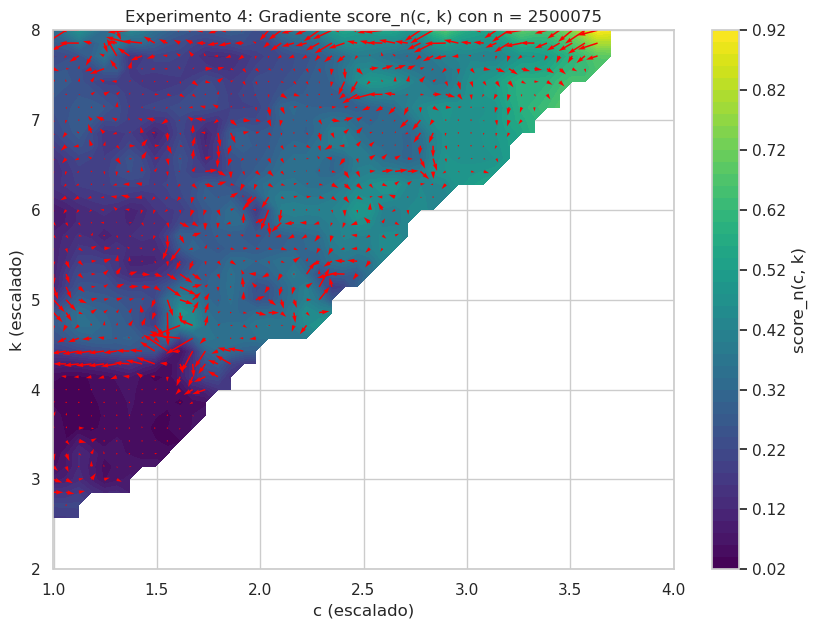

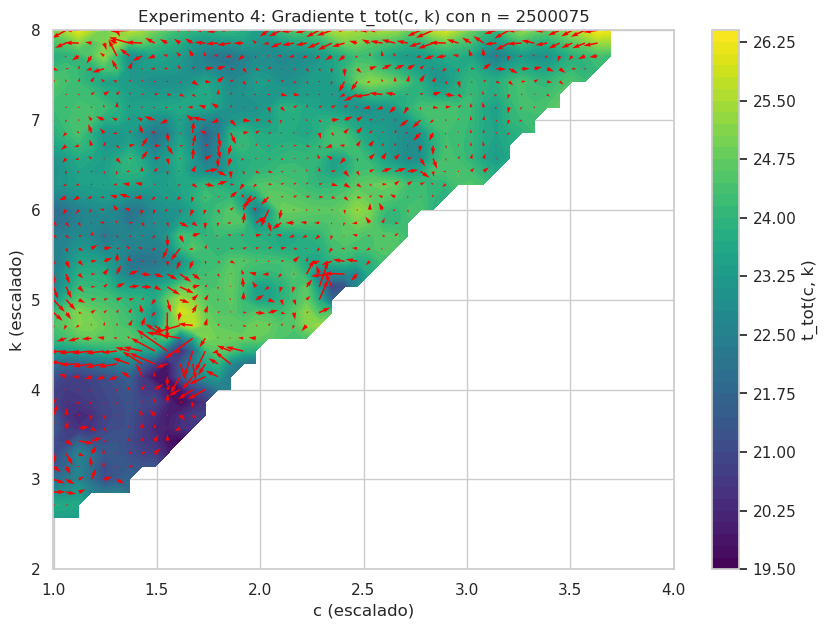

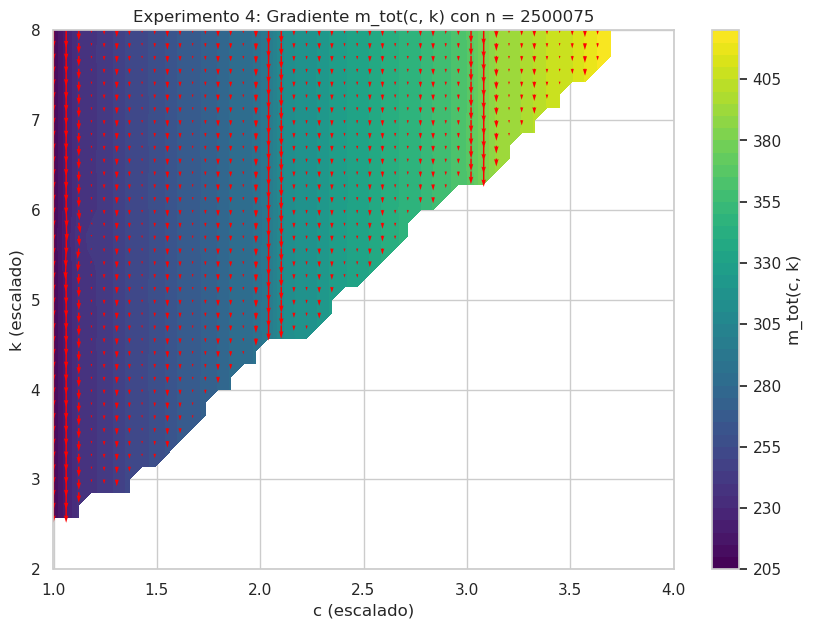

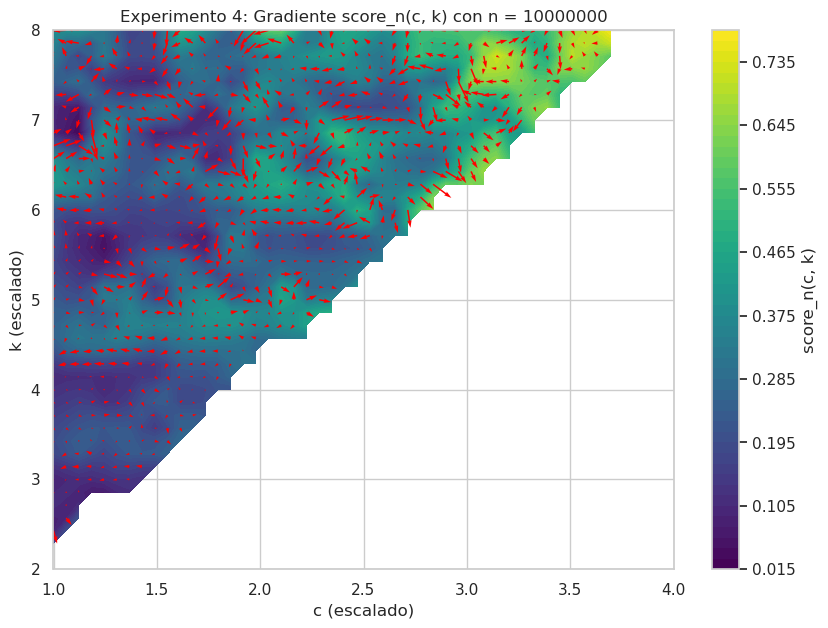

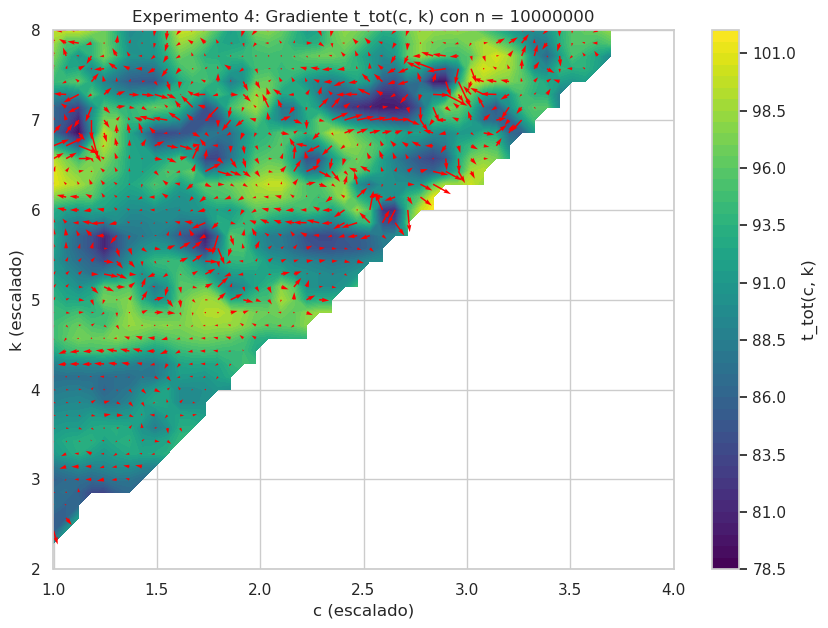

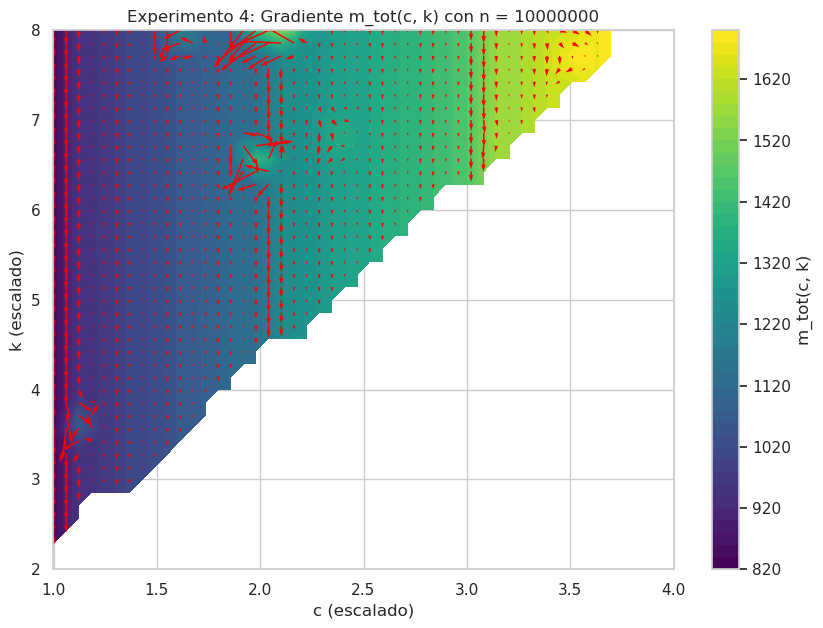

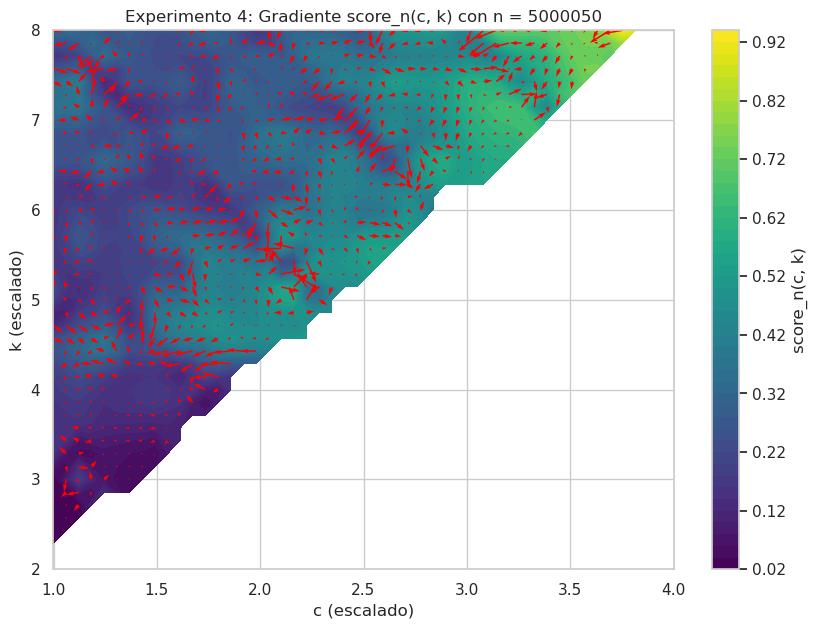

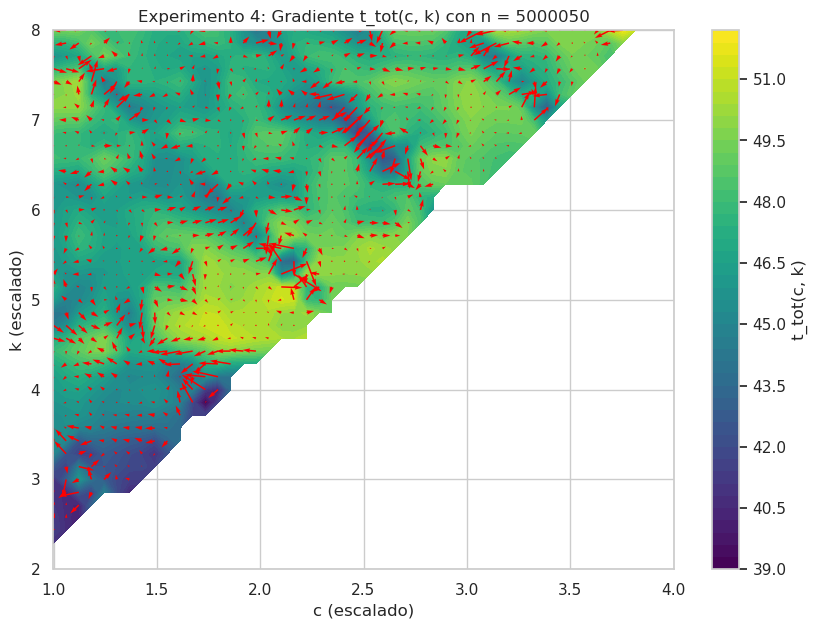

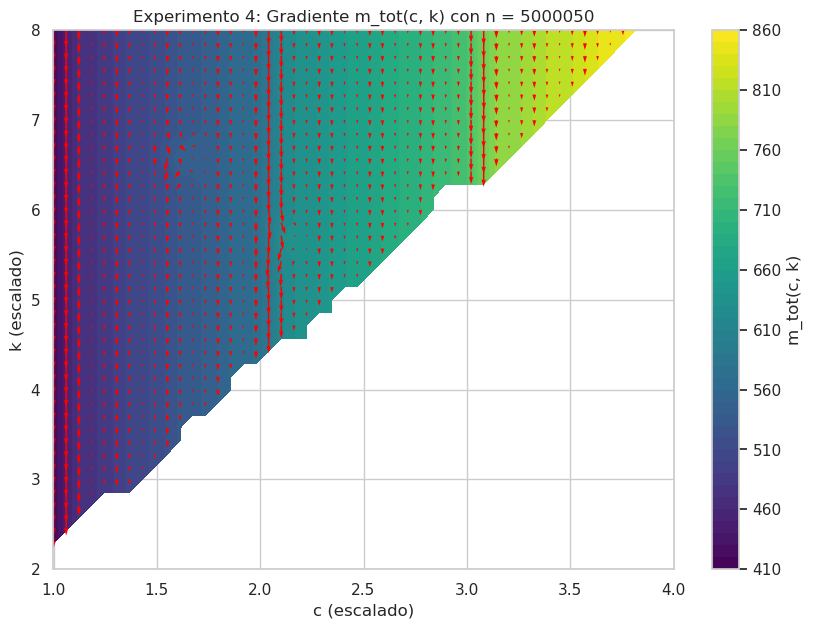

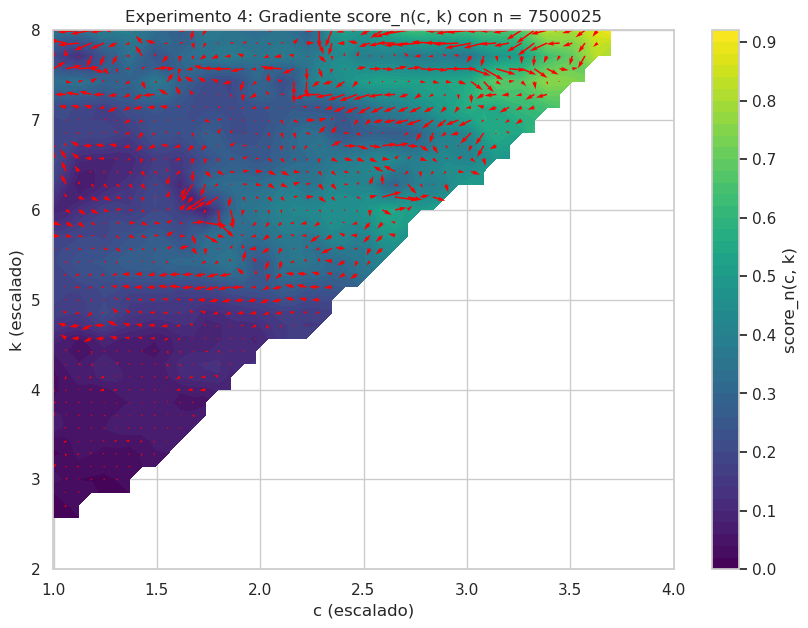

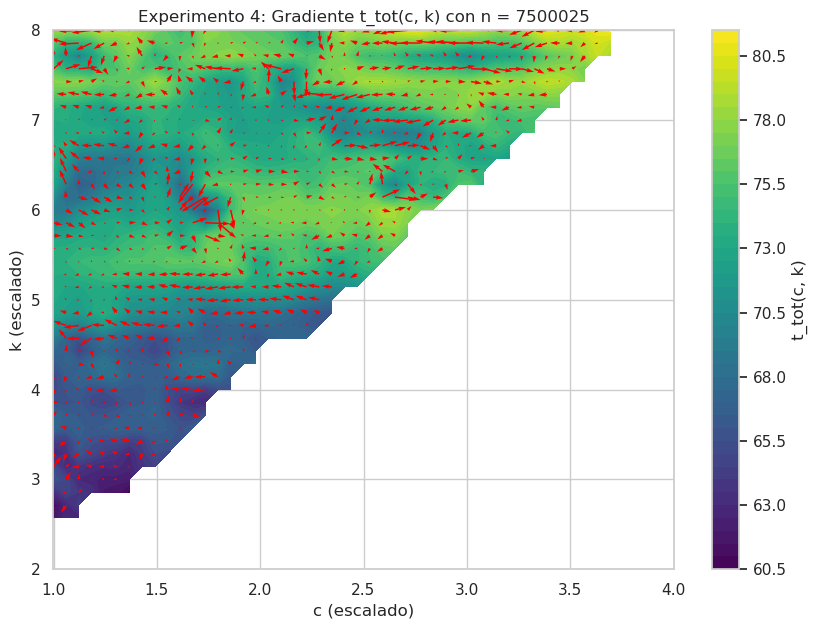

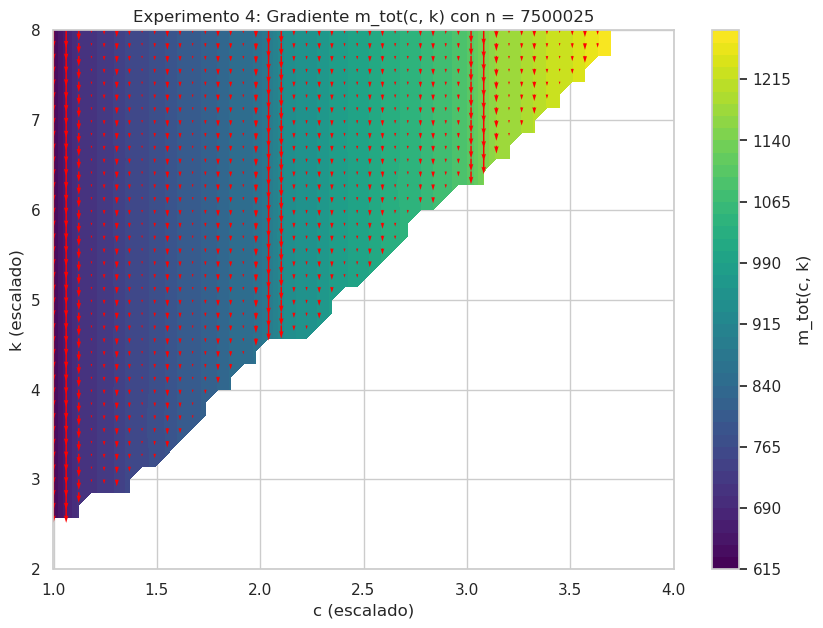

In [138]:


# Definir los nombres de las columnas como variables
col_N = 'n'
col_d1 = 'c'
col_d2 = 'k'
col_F = 'score_n'
title = "Gradiente de "

def plot_grad(col_F, col_d1, col_d2, n, k):
    # Fijar N en un valor específico (por ejemplo, cercano a la media)
    N_fixed = df[col_N].mean()

    # Filtrar el DataFrame para el valor fijo de N
    df_fixed = df[df[col_N] == n]  # Ajustar `atol` según los datos

    # Usar las variables escaladas
    d1 = df_fixed[col_d1]
    d2 = df_fixed[col_d2]
    f = df_fixed[col_F]

    # Crear una malla 2D regular
    grid_d1, grid_d2 = np.meshgrid(
        np.linspace(d1.min(), d1.max(), 50),
        np.linspace(d2.min(), d2.max(), 50)
    )

    # Interpolación para rellenar el grid
    grid_f = griddata(
        points=np.array([d1, d2]).T,
        values=f,
        xi=(grid_d1, grid_d2),
        method='linear'
    )

    # Calcular el gradiente en el plano 2D
    grad_Fd1, grad_Fd2 = np.gradient(grid_f)
    grad_Fd1, grad_Fd2 = -grad_Fd1, -grad_Fd2

    # Graficar el campo vectorial en el plano d1-d2
    plt.figure(figsize=(10, 7))
    plt.contourf(grid_d1, grid_d2, grid_f, levels=50, cmap='viridis')
    plt.colorbar(label=f'{col_F}({col_d1}, {col_d2})')
    plt.ylim(2, 8)

    # Agregar el campo vectorial
    plt.quiver(grid_d1, grid_d2, grad_Fd1, grad_Fd2, color='red')

    plt.title(f"Experimento 4: Gradiente {col_F}({col_d1}, {col_d2}) con {col_N} = {n}")
    plt.xlabel(f"{col_d1} (escalado)")
    plt.ylabel(f"{col_d2} (escalado)")
    plt.savefig(CHART_PATH+f"4_{col_F}_{k}.png")
    plt.show()

sorted

for i, n in enumerate(sorted(df["n"].unique())):
    plot_grad(col_F, col_d1, col_d2, n, i)
    plot_grad("t_tot", col_d1, col_d2, n, i)
    plot_grad("m_tot", col_d1, col_d2, n, i)

# Buen dato rei